# Log Scale in Charts and Graphs

차트 또는 그래프안에서 logarithmic scales을 사용하는 2가지 이유가 있습니다.

1. 큰 값의 skewness에 대한 처리 
2. percent change 또는 multiplicative factors를 보여주기 위해서


### Basic 

먼저 초등학교때 배운 logs를 다시 되집어보면.. log란 exponential equations의 다른 표현입니다. <br>
즉 $ 2^4 = 16 $ 은 $ \log_2(16) = 4 $ 이렇게 표현될 수 있습니다. 즉 log란 **exponent** (즉 여기에서는 4)입니다.<br>

$$ y = log_b (x) $$

위 공식의 의미는.. x의 값을 얻기위해서 b의 값이 y exponent (or power)만큼 raised 되었다는 뜻입니다. 



In [123]:
%pylab inline
import numpy as np
import pandas as pd
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


## Data

* [S&P 500 Companies with Financial Information](http://data.okfn.org/data/core/s-and-p-500-companies)

S&P 500 회사의 Price부분을 순서대로 정렬했습니다.

데이터에 따르면 Priceline.com Inc 가 다른 회사와 비교하였을때 월등히 높은 값을 보여주고 있습니다.<br>
때문에 다른 회사들은 다소 

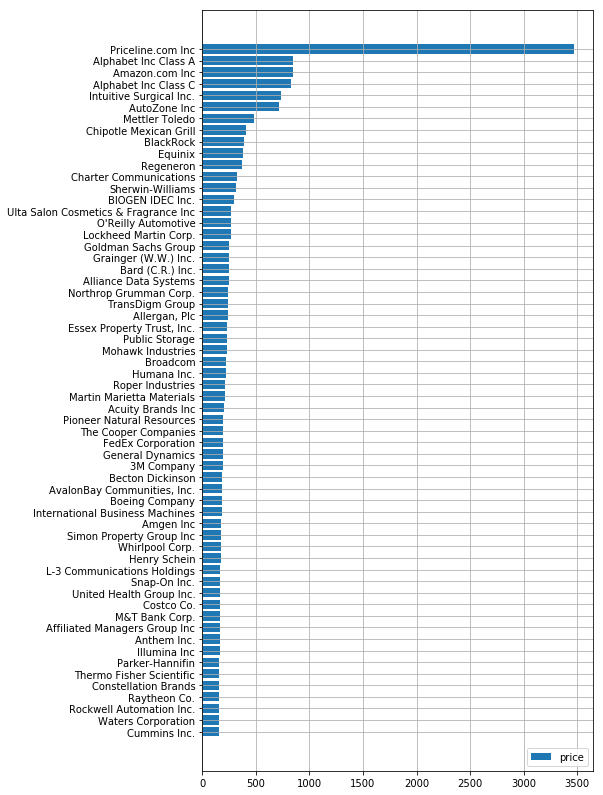

In [281]:
COL_VALUE_NAME = 'Price'
PLOT_SIZE = 60

data = pd.read_csv('/dataset/s&p-500-financial-information/s&p_500_financial_information.csv')
data = data[~data[COL_VALUE_NAME].isnull()]
data = data[[COL_VALUE_NAME, 'Name']].sort_values(by=COL_VALUE_NAME)

names = data['Name'].as_matrix()
data = data[COL_VALUE_NAME].as_matrix()
data[-1] *= 2 # 의도적으로 더 크게 만듬. 

def visualize(data, labels, scale='linear', ticks=None):
    fig, ax = subplots(figsize=(7, 14))
    for d, label in zip(data, labels):
        barh(range(len(d[-PLOT_SIZE:])), d[-PLOT_SIZE:], figure=fig, label=label)
        
    ax.set_yticklabels(names[-PLOT_SIZE:])
    yticks(range(PLOT_SIZE))
    xscale(scale)
    if ticks:
        xticks(ticks)
    grid()
    legend(loc=4)

visualize([data], labels=['price'])

## Log Scale

logarithmic scale을 했습니다.<br>
linear scale로 그렸을때는 한쪽으로 너무 치우쳐져서 다른 값들을 볼 수 없었는데, log scale로 그릴경우 비교가 더 잘 됩니다.<br>
또한 linear scale에서는 Priceline.com Inc의 Price값은 Alphabet Inc의 Price + 2개간의 차이였다면.. <br>
log scale에서는 2개 회사의 차이는 1.2배 차이가 난다 이렇게 보면 됩니다. (즉 배수로)

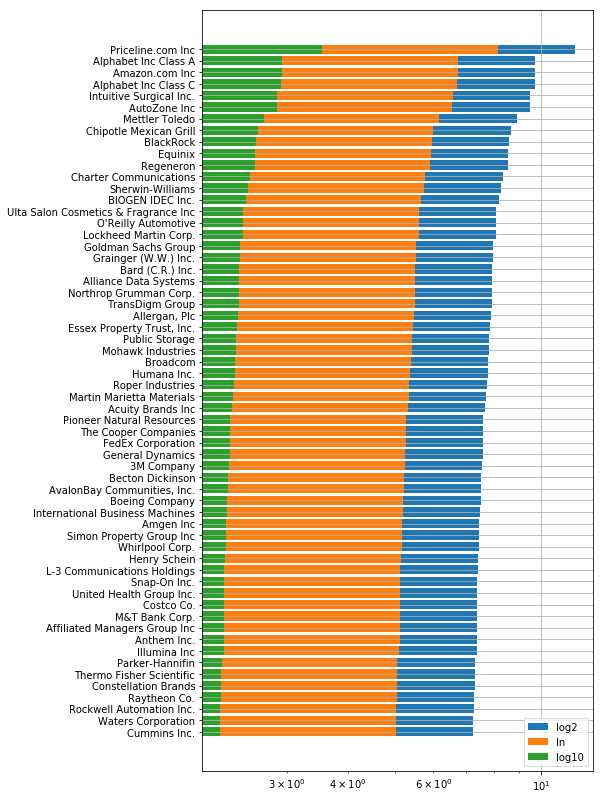

In [287]:
data_log10 = np.log10(data)
data_log2 = np.log2(data)
data_log = np.log(data)

visualize([data_log2, data_log, data_log10],
          ['log2', 'ln', 'log10'],
          scale='log')